<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_7_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%90%D0%BA%D0%B8%D0%BC%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# from scipy import stats
# from sklearn import linear_model
# from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import ComplementNB
# from sklearn import tree
# from sklearn import ensemble
# from sklearn import metrics
# from sklearn import cluster
# from sklearn import feature_selection

import warnings
warnings.filterwarnings("ignore")

# from sys import getsizeof
# import pickle

# from google.colab import drive
# drive.mount('/content/drive')

path = "https://raw.githubusercontent.com/akitim/datasets/main/spam_or_not_spam.zip"
data = pd.read_csv(path)
data.sample(5)


,email,label
2860,office of egnr femi daniel federal ministry of...,1
612,i m a bit confused about this boycott thing h...,0
52,john p looney stated the following on thu aug ...,0
1196,indeed i was thinking of getting back into doi...,0
2711,hyperlink copyright NUMBER all rights reserve...,1


In [2]:
# частоты классов, 1 - спам, 0 - не спам
class_num = data['label'].value_counts()
print(f"В датасете писем:\n\tcо спамом: {class_num[1]}" +\
      f"\n\tбез спама: {class_num[0]}\n")
class_freq = class_num / data['label'].size
# labels = class_freq.index.to_list()
class_freq

В датасете писем:
	cо спамом: 500
	без спама: 2500



0    0.833333
1    0.166667
Name: label, dtype: float64

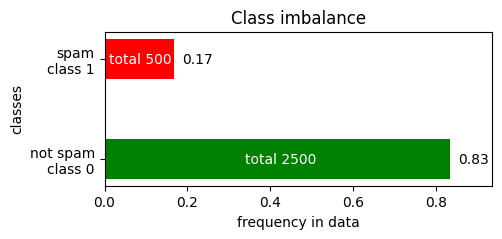

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.barh(y=['not spam\nclass 0', 'spam\nclass 1'], width=class_freq,
        height=0.4, color=['g', 'r']);
ax.set_ylabel('classes');
ax.set_xlabel('frequency in data');
ax.set_title('Class imbalance');
ax.text(class_freq[0] / 2 - 0.078, -0.05, f'total {class_num[0]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[0] + 0.02, -0.05, f'{np.round(class_freq[0], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.text(class_freq[1] / 2 - 0.072, 0.95, f'total {class_num[1]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[1] + 0.02, 0.95, f'{np.round(class_freq[1], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.set_xbound(ax.get_xbound()[0], ax.get_xbound()[1] + 0.06)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
data_clean = data.copy()
data_clean["email"] = data_clean["email"].str.replace('\W+', ' ').\
    str.replace('\s+', ' ').str.strip().str.lower()
data_clean["email"][data_clean["email"] == ''] = np.NaN
data_clean.dropna(inplace=True)


# 2806
# 2828
# 2966
# data_clean.loc[[2806, 2828, 2966], 'email']


Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
print("Признаков в наборе данных:", X.shape[1])

Признаков в наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
X = X.todense()
y = data_clean['label'].values


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
) #[1].shape
X_train, X_test, y_train, y_test =  np.asarray(X_train), np.asarray(X_test),\
     np.asarray(y_train), np.asarray(y_test)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
np.round(y_test.mean(), 3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [11]:
# from sklearn.naive_bayes import ComplementNB
NB_compl = ComplementNB(alpha=0.01)
NB_compl.fit(np.asarray(X_train), y_train);


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [12]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

y_pred = NB_compl.predict(X_test)
y_proba = NB_compl.predict_proba(X_test)

TP = np.sum(y_pred + y_test == 2)
TN = np.sum(y_pred + y_test == 0)
FP = np.sum(y_pred[y_test == 0] == 1)
FN = np.sum(y_pred[y_test == 1] == 0)
# print(np.array([[TP, FP], [FN, TN]]))

# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# sensitivity = TP / (TP + FN)
# specificity = TN / (TN + FP)
# balanced_accuracy = (recall + specificity) / 2
# f1_score = 2 * precision * recall / precision + recall

# sklearn_ = [precision_score(y_test, y_pred), recall_score(y_test, y_pred),
#             2 * balanced_accuracy_score(y_test, y_pred) - recall_score(y_test, y_pred),
#             balanced_accuracy_score(y_test, y_pred),
#             f1_score(y_test, y_pred)]

metrics_df = pd.DataFrame(
    {'Precision': [TP / (TP + FP)], 'Recall(sensitivity)': [TP / (TP + FN)],
     'Specificity': [TN / (TN + FP)],
     'Balanced accuracy': [(TP / (TP + FN) + TN / (TN + FP) ) / 2],
     'F1-score': [2 * TP / (2 * TP + FP + FN)]
     }, index = ['metrics value']).T
metrics_df['metrics value'] = metrics_df['metrics value'].round(3)
# metrics_df['sklearn metrics'] = sklearn_
metrics_df

,metrics value
Precision,1.000
Recall(sensitivity),0.927
Specificity,1.000
Balanced accuracy,0.964
F1-score,0.962


In [13]:
# delete
from sklearn.metrics import roc_curve
fpr, tpr, thrs = roc_curve(y_test, y_proba[:, 1], pos_label=1)
# plt.plot(fpr, tpr)
# fpr, tpr, thrs

len(np.insert(sorted(np.unique(y_proba), reverse=True), 0, 2))

np.insert(sorted(np.unique(np.round(y_proba, 5))), 0, 2)

array([2.0000e+00, 0.0000e+00, 1.0000e-05, 2.0000e-05, 5.0000e-05,
       4.2000e-04, 5.6000e-04, 5.9000e-04, 8.0000e-04, 1.0800e-03,
       2.2700e-03, 3.1000e-03, 5.6900e-03, 7.1400e-03, 2.5030e-02,
       3.9520e-02, 6.3290e-02, 1.9778e-01, 3.9558e-01, 4.1845e-01,
       4.4567e-01, 5.5433e-01, 5.8155e-01, 6.0442e-01, 8.0222e-01,
       9.3671e-01, 9.6048e-01, 9.7497e-01, 9.9286e-01, 9.9431e-01,
       9.9690e-01, 9.9773e-01, 9.9892e-01, 9.9920e-01, 9.9941e-01,
       9.9944e-01, 9.9958e-01, 9.9995e-01, 9.9998e-01, 9.9999e-01,
       1.0000e+00])

Нарисуйте ROC-кривую:

0.9637096774193548

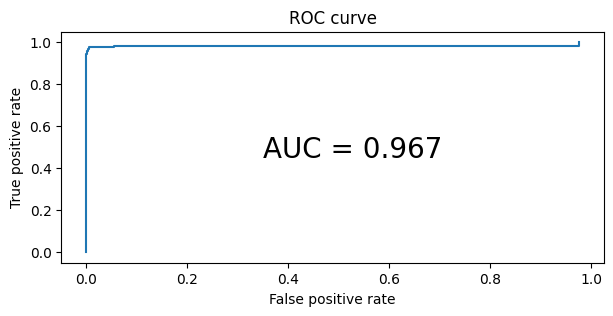

In [84]:
def ROC_curve_custom(y_true, y_proba, detail=15):
    '''
    Расчет ROC кривой для классификатора
    Параметры:
    y_true: numpy.ndarray - вектор реальных классов объектов размером (n_samples,)
    y_proba: numpy.ndarray - вектор предсказаний вероятности класса 1
                             размером (n_samples,)
    detail: int [0, inf] - детализация кривой

    Возвращает:
    tuple(FPR, TPR, thresholds)
    FPR: numpy.ndarray вектор значений false positive rate размером (len(thresholds),)
    TPR: numpy.ndarray вектор значений true positive rate размером  (len(thresholds),)
    thresholds: numpy.ndarray вектор значений порогов, длина зависит от detail
    '''
    #кол-во элементов класса 1
    N_pos = np.sum(y_true)
    #кол-во элементов класса 0
    N_neg = - np.sum(y_true - 1) #y_true.size - N_pos
    # thresholds = np.array([2.0, 1.00000000e+000, 3.95582034e-001, 1.97777725e-001,
    #     2.50304524e-002, 7.13896259e-003, 5.69060755e-003, 8.01737212e-004,
    #     5.87674160e-004, 2.94115091e-006, 1.71626708e-006, 4.97861450e-009,
    #     4.88105108e-009, 9.52112111e-011, 8.57231319e-011, 3.86618520e-052,
    #     2.56990706e-052, 2.17388884e-322, 0.00000000e+000])

    # пороги - уникальные зн-я y_proba для класса 1 в убыв. порядке
    thresholds = np.insert(sorted(np.unique(np.round(y_proba, detail)),
                                  reverse=True), 0, 1.01)
    y_proba_ = y_proba.copy()
    FPR = [] #false pos rate
    TPR = [] #true neg rate
    for threshold in thresholds:
        FPR += [np.sum(y_proba_[y_true == 0] > threshold) / N_neg]
        TPR += [np.sum(y_proba_[y_true == 1] > threshold) / N_pos]

    return np.asarray(FPR), np.asarray(TPR), np.asarray(thresholds)

FPR, TPR, thrs = ROC_curve_custom(y_test, y_proba[:, 1], 10)

# находим площадь под ROC методом трапеций
dFPR = FPR[1:] - FPR[:-1]
halfsum_TPR = (TPR[1:] + TPR[:-1]) / 2
ROC_AUC = np.sum(dFPR * halfsum_TPR)
# ROC_AUC = np.sum(dFPR * TPR[:-1])

# для ступенчатого вида ROC как в sklearn
FPR_step = np.ravel(list(zip(FPR, FPR)))[1:]
TPR_step = np.ravel(list(zip(TPR, TPR)))[:-1]

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.plot(FPR_step, TPR_step);
ax.set_xlabel('False positive rate');
ax.set_ylabel('True positive rate');
ax.set_title('ROC curve');
# ax.set_xlim(-0.001, 0.01)
# ax.set_ylim(0.89, 1)
ax.text(0.35, 0.5-0.05, f'AUC = {np.round(ROC_AUC, 5)}', fontdict={'size':20});
roc_auc_score(y_test, y_pred)

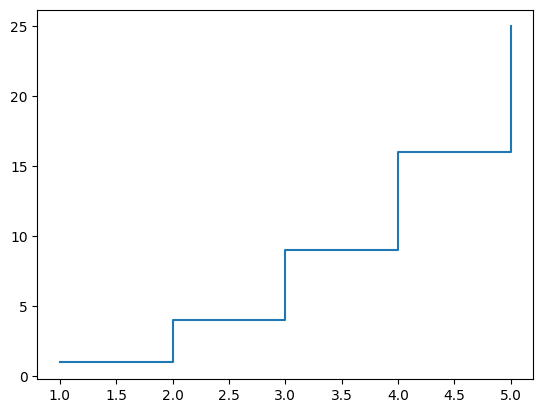

In [58]:
# delete
x_ = np.array([1, 2, 3, 4, 5])
y_ = x**2
x_ = np.ravel(list(zip(x_, x_)))[1:]
y_ = np.ravel(list(zip(y_, y_)))[:-1]
plt.plot(x_, y_);
# ind = np.arange(1, len(x_) - 1, 2)
# np.insert(x_, ind, x_[ind])

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь